In [ ]:
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -o /tmp/rock_paper_scissors.zip

In [ ]:
#ekstrasi file zip
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir      = print("Isi folder: ", os.listdir('/tmp/rockpaperscissors'))
rock_data     = os.listdir('/tmp/rockpaperscissors/rock')
print("Total gambar batu: ",len(rock_data))
paper_data    = os.listdir('/tmp/rockpaperscissors/paper')
print("Total gambar kertas: ", len(paper_data))
scissors_data = os.listdir('/tmp/rockpaperscissors/scissors')
print("Total gambar gunting: ",len(scissors_data))

#definisi lokasi untuk data batu,kertas,gunting, train dan test
base_dir       = '/tmp/rockpaperscissors'
rock_dir       = os.path.join(base_dir,'rock')
paper_dir      = os.path.join(base_dir,'paper')
scissors_dir   = os.path.join(base_dir,'scissors')
train_dir      = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

#membuat folder untuk menyimpan data train dan date test 
os.mkdir(train_dir)
os.mkdir(validation_dir)

#train_split untuk membagi setiap data gamnbar untuk data test dan train dengan rasio 6:4 dan menyimpan kedalam variable terlbih dahulu
train_rock, val_rock         = train_test_split(os.listdir(rock_dir),test_size = 0.4)
print("Jumlah Val Rock : ",len(val_rock))
train_paper, val_paper       = train_test_split(os.listdir(paper_dir),test_size = 0.4)
print("Jumlah Val Paper : ",len(val_paper))
train_scissors, val_scissors = train_test_split(os.listdir(scissors_dir),test_size = 0.4)
print("Jumlah Val Scissors : ",len(val_scissors))

#membuat folder baru didalam data train dan test untuk setiap kateogori
#data rock
dir_train_rock     = os.path.join(train_dir,'rock')
os.mkdir(dir_train_rock  )
dir_train_paper    = os.path.join(train_dir,'paper')
os.mkdir(dir_train_paper)
dir_train_scissors = os.path.join(train_dir,'scissors')
os.mkdir(dir_train_scissors)

dir_val_rock       = os.path.join(validation_dir,'rock')
os.mkdir(dir_val_rock)
dir_val_paper      = os.path.join(validation_dir,'paper')
os.mkdir(dir_val_paper)
dir_val_scissors   = os.path.join(validation_dir,'scissors')
os.mkdir(dir_val_scissors)

#copy data yang telah di split ke dalam masing masing folder
for data in train_rock:
    shutil.copy(os.path.join(rock_dir,data), os.path.join(dir_train_rock,data))
for data in train_paper:
    shutil.copy(os.path.join(paper_dir,data), os.path.join(dir_train_paper,data))
for data in train_scissors:
    shutil.copy(os.path.join(scissors_dir,data), os.path.join(dir_train_scissors,data))

for data in val_rock:
    shutil.copy(os.path.join(rock_dir,data), os.path.join(dir_val_rock,data))
for data in val_paper:
    shutil.copy(os.path.join(paper_dir,data), os.path.join(dir_val_paper,data))
for data in val_scissors:
    shutil.copy(os.path.join(scissors_dir,data), os.path.join(dir_val_scissors,data))


Isi folder:  ['README_rpc-cv-images.txt', 'scissors', 'rps-cv-images', 'paper', 'rock']
Total gambar batu:  726
Total gambar kertas:  712
Total gambar gunting:  750
Jumlah Val Rock :  291
Jumlah Val Paper :  285
Jumlah Val Scissors :  300


In [ ]:
#data generator

train_datagen = ImageDataGenerator(
                                    rescale         = 1./255,
                                    rotation_range  = 20,
                                    horizontal_flip = True,
                                    shear_range     = 0.2,
                                    fill_mode       = 'nearest'
                                  )

val_datagen = ImageDataGenerator(
                                    rescale         = 1./255,
                                    rotation_range  = 20,
                                    horizontal_flip = True,
                                    shear_range     = 0.2,
                                    fill_mode       = 'nearest'
                                  )
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (150,150),
                                                    batch_size  = 32,
                                                    class_mode  = 'categorical'
                                                  )
validation_generator = val_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size = (150,150),
                                                    batch_size  = 32,
                                                    class_mode  = 'categorical'
                                                  )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#menggunakan empat konvulusi
model = tf.keras.models.Sequential([
                                    #konv pertama atau input
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv kedua
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv ketiga
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #konv keempat
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #ouput
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                  ])
#compile model dengan 'adam' optimizer loss function categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy']
             )
train = model.fit(
                  train_generator,
                  steps_per_epoch = 25,
                  epochs = 18,
                  validation_data = validation_generator,
                  validation_steps = 5,
                  verbose = 2
                )

Epoch 1/18
25/25 - 50s - loss: 1.1669 - accuracy: 0.3650 - val_loss: 1.0602 - val_accuracy: 0.3875
Epoch 2/18
25/25 - 48s - loss: 0.8513 - accuracy: 0.6212 - val_loss: 0.6663 - val_accuracy: 0.7750
Epoch 3/18
25/25 - 49s - loss: 0.3957 - accuracy: 0.8550 - val_loss: 0.3101 - val_accuracy: 0.8875
Epoch 4/18
25/25 - 48s - loss: 0.2576 - accuracy: 0.9112 - val_loss: 0.1901 - val_accuracy: 0.9438
Epoch 5/18
25/25 - 48s - loss: 0.2049 - accuracy: 0.9250 - val_loss: 0.3162 - val_accuracy: 0.9187
Epoch 6/18
25/25 - 48s - loss: 0.2278 - accuracy: 0.9175 - val_loss: 0.1412 - val_accuracy: 0.9500
Epoch 7/18
25/25 - 48s - loss: 0.1368 - accuracy: 0.9513 - val_loss: 0.1359 - val_accuracy: 0.9250
Epoch 8/18
25/25 - 49s - loss: 0.1358 - accuracy: 0.9463 - val_loss: 0.1731 - val_accuracy: 0.9563
Epoch 9/18
25/25 - 48s - loss: 0.1527 - accuracy: 0.9425 - val_loss: 0.1939 - val_accuracy: 0.9500
Epoch 10/18
25/25 - 48s - loss: 0.1217 - accuracy: 0.9525 - val_loss: 0.2054 - val_accuracy: 0.9500
Epoch 11/

Saving the-palm-of-your-hand-finger-hand-let.jpg to the-palm-of-your-hand-finger-hand-let.jpg
the-palm-of-your-hand-finger-hand-let.jpg
KERTAS


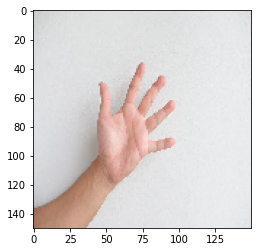

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  
  if classes[0][0] == 1:
    print("KERTAS")
  elif classes[0][1] == 1:
    print("BATU")
  elif classes[0][2] == 1:
    print("GUNTING")
 


 